## Course : CS-513 KDD
## Name : Ali Abdullah Ahmad
## CWId : 20031246
## HW_04_CART

In [178]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [179]:
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS513_Knowledge_Discovery&Data_Mining/HW/salary.csv')

In [180]:
df

,Occupation,Gender,Age,Salary
0,Service,Female,45,"$48,000"
1,Service,Male,25,"$25,000"
2,Service,Male,33,"$35,000"
3,Management,Male,25,"$45,000"
4,Management,Female,35,"$65,000"
5,Management,Male,26,"$45,000"
6,Management,Female,45,"$70,000"
7,Sales,Female,40,"$50,000"
8,Sales,Male,30,"$40,000"
9,Staff,Female,50,"$40,000"


In [181]:
# Convert Salary to numeric values
df['Salary'] = df['Salary'].replace('[\$,]', '', regex=True).astype(float)

# Discretize Salary into Levels
def salary_level(salary):
    if salary < 35000:
        return 'Level 1'
    elif 35000 <= salary < 45000:
        return 'Level 2'
    elif 45000 <= salary < 55000:
        return 'Level 3'
    else:
        return 'Level 4'

# Discretize Age into Categories
def age_category(age):
    if age <= 30:
        return '<=30'
    elif 31 <= age <= 40:
        return '<=40'
    else:
        return '<=50'

df['Age_category'] = df['Age'].apply(age_category)


df['Salary_Level'] = df['Salary'].apply(salary_level)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\abdul\AppData\Local\Temp\ipykernel_21660\1399670613.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Salary'] = df['Salary'].replace('[\$,]', '', regex=True).astype(float)


In [182]:
df

,Occupation,Gender,Age,Salary,Age_category,Salary_Level
0,Service,Female,45,48000.0,<=50,Level 3
1,Service,Male,25,25000.0,<=30,Level 1
2,Service,Male,33,35000.0,<=40,Level 2
3,Management,Male,25,45000.0,<=30,Level 3
4,Management,Female,35,65000.0,<=40,Level 4
5,Management,Male,26,45000.0,<=30,Level 3
6,Management,Female,45,70000.0,<=50,Level 4
7,Sales,Female,40,50000.0,<=40,Level 3
8,Sales,Male,30,40000.0,<=30,Level 2
9,Staff,Female,50,40000.0,<=50,Level 2


In [183]:
# Encode categorical features
encoder = LabelEncoder()
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Age_category'] = encoder.fit_transform(df['Age_category'])
df['Salary_Level'] = encoder.fit_transform(df['Salary_Level'])  # Target variable

In [184]:
# Define features (X) and target (y)
X = df[['Occupation', 'Gender', 'Age_category']]
y = df['Salary_Level']

# Initialize the Decision Tree Classifier with entropy
model = DecisionTreeClassifier(criterion='entropy', max_depth=1)  # Only one split level
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

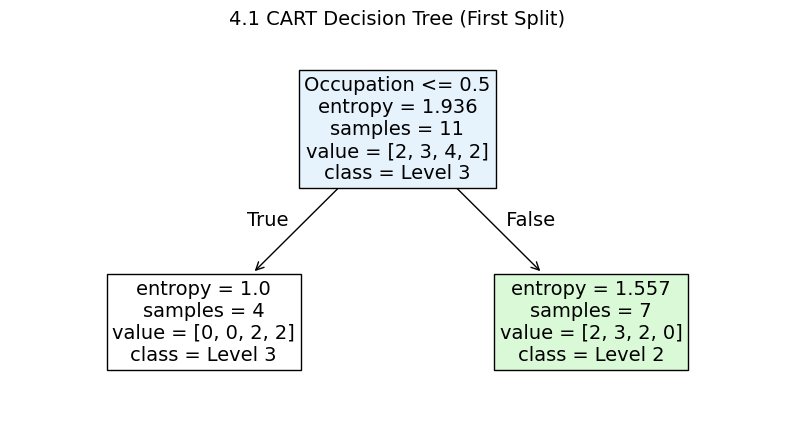

In [185]:
plt.figure(figsize=(10, 5))
tree.plot_tree(
    model,
    feature_names=['Occupation', 'Gender', 'Age_category'],  # Feature names
    class_names=['Level 1', 'Level 2', 'Level 3', 'Level 4'],  # Class labels
    filled=True,
    fontsize=14
)
plt.title("4.1 CART Decision Tree (First Split)", fontsize=14)
plt.show()

# #4.2

In [186]:
# Load the dataset
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS513_Knowledge_Discovery&Data_Mining/HW/breast-cancer-wisconsin.csv')

# Display the first few rows of the dataset
print(df.head())

    Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9  Class
0  1000025   5   1   1   1   2   1   3   1   1      2
1  1002945   5   4   4   5   7  10   3   2   1      2
2  1015425   3   1   1   1   2   2   3   1   1      2
3  1016277   6   8   8   1   3   4   3   7   1      2
4  1017023   4   1   1   3   2   1   3   1   1      2


In [187]:
# Convert the diagnosis class to binary format
df['Class'] = df['Class'].map({2: 0, 4: 1})

In [188]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values and not replace NaN
df = df.dropna()

In [189]:
# Split the data into features (X) and target (y)
X = df.drop(['Sample', 'Class'], axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
# Initialize the DecisionTreeClassifier
modelD = DecisionTreeClassifier(max_depth=1, random_state=42)
# Train the model
modelD.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [191]:
# Make predictions on the test set
y_pred = modelD.predict(X_test)

In [192]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9073170731707317
Confusion Matrix:
[[125   2]
 [ 17  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       127
           1       0.97      0.78      0.87        78

    accuracy                           0.91       205
   macro avg       0.92      0.88      0.90       205
weighted avg       0.91      0.91      0.90       205



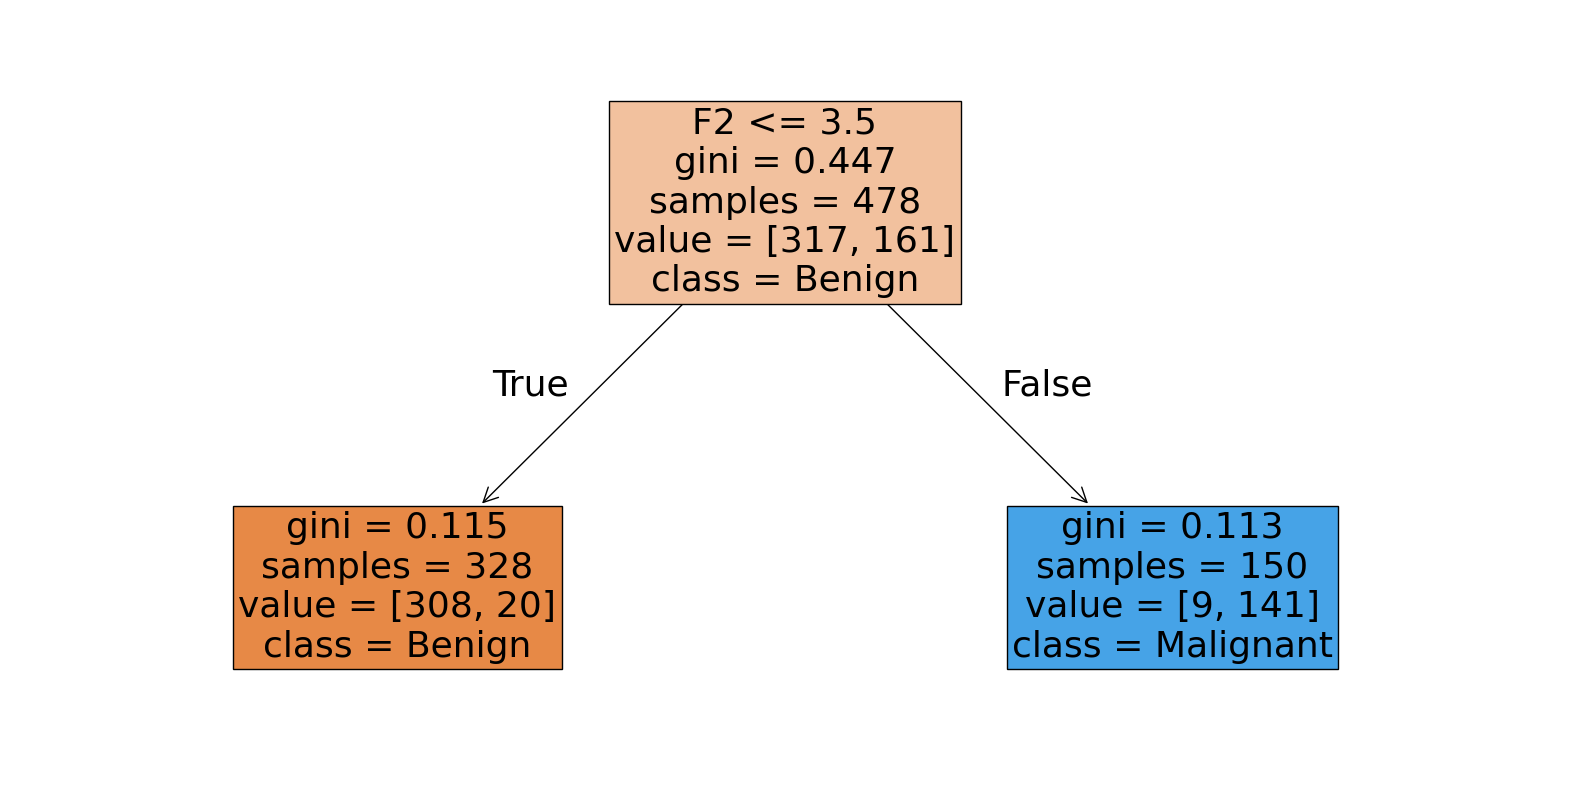

In [193]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(modelD, filled=True, feature_names=X.columns,fontsize=26, class_names=['Benign', 'Malignant'])
plt.show()